In [17]:
#Importing libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy
import pandas as pd

In [18]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

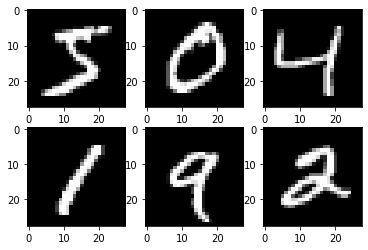

In [19]:
#Plotting
import matplotlib.pyplot as plt

for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

In [20]:
#Reshaping the matrix

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [22]:
#Converting a class vector to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
#Normalizing inputs
X_train = X_train / 255
X_test = X_test / 255

In [26]:
#Defining CNN model
def create_model():
    num_classes = 10
    model = Sequential()
    model.add(Convolution2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

#Building the model
model = create_model()

In [28]:
#Training the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)
print("Model is trained")

#Saving the model as model.h5
model.save('model.h5')
print("Model is saved as model.h5")

Epoch 1/10
300/300 - 143s - loss: 0.1352 - accuracy: 0.9595 - val_loss: 0.0530 - val_accuracy: 0.9837
Epoch 2/10
300/300 - 142s - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0343 - val_accuracy: 0.9887
Epoch 3/10
300/300 - 142s - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0307 - val_accuracy: 0.9894
Epoch 4/10
300/300 - 142s - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0289 - val_accuracy: 0.9904
Epoch 5/10
300/300 - 142s - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0279 - val_accuracy: 0.9913
Epoch 6/10
300/300 - 141s - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 7/10
300/300 - 141s - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 8/10
300/300 - 141s - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 9/10
300/300 - 141s - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0260 - val_accuracy: 0.9920
Epoch 10/10
300/300 - 141s - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0253 - 

In [31]:
#Evaluating the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Error: %.2f%%" % (100-scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Error: 0.69%
Test loss: 0.025263996794819832
Test accuracy: 0.9930999875068665
